<a href="https://www.kaggle.com/code/iqmansingh/machine-failures-baseline?scriptVersionId=133891078" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [29]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark")
print("Setup Complete")

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv
/kaggle/input/machine-failure-predictions/machine failure.csv
Setup Complete


# Importing Datasets

In [30]:
train_path = "../input/playground-series-s3e17/train.csv"
orig_path = "../input/machine-failure-predictions/machine failure.csv"
test_path = "../input/playground-series-s3e17/test.csv"

train_data = pd.read_csv(train_path,index_col="id")
orig_data = pd.read_csv(orig_path,index_col="UDI")
test_data = pd.read_csv(test_path,index_col="id")

train_data = train_data.append(orig_data)
train_data.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [31]:
print(train_data.info(),test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146429 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               146429 non-null  object 
 1   Type                     146429 non-null  object 
 2   Air temperature [K]      146429 non-null  float64
 3   Process temperature [K]  146429 non-null  float64
 4   Rotational speed [rpm]   146429 non-null  int64  
 5   Torque [Nm]              146429 non-null  float64
 6   Tool wear [min]          146429 non-null  int64  
 7   Machine failure          146429 non-null  int64  
 8   TWF                      146429 non-null  int64  
 9   HDF                      146429 non-null  int64  
 10  PWF                      146429 non-null  int64  
 11  OSF                      146429 non-null  int64  
 12  RNF                      146429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 15.6+ MB
<c

In [32]:
train_data.drop(["Product ID"],inplace=True,axis=1)
test_data.drop(["Product ID"],inplace=True,axis=1)

In [33]:
test_data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

# Data Cleaning

In [34]:
train_data.columns = ['Type', 'Air_Temp', 'Process_Temp', 'Rot_Speed', 'Torque',
       'Tool_Wear', 'Machine_Failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
test_data.columns = ['Type', 'Air_Temp', 'Process_Temp', 'Rot_Speed', 'Torque',
       'Tool_Wear', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

catDTypeCols = ['Type']

In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

train_data["Type"] = encoder.fit_transform(train_data["Type"])
test_data["Type"] = encoder.transform(test_data["Type"])
train_data.head()

,Type,Air_Temp,Process_Temp,Rot_Speed,Torque,Tool_Wear,Machine_Failure,TWF,HDF,PWF,OSF,RNF
0,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [36]:
train_data["Temp_Diff"] = train_data["Process_Temp"]-train_data["Air_Temp"]
test_data["Temp_Diff"] = test_data["Process_Temp"]-test_data["Air_Temp"]

# Normalizing Data

In [37]:
train_data.columns

Index(['Type', 'Air_Temp', 'Process_Temp', 'Rot_Speed', 'Torque', 'Tool_Wear',
       'Machine_Failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Temp_Diff'],
      dtype='object')

In [53]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

numericalCols = ['Air_Temp', 'Process_Temp', 'Rot_Speed', 'Torque', 'Tool_Wear','Temp_Diff']

train_nor = train_data.copy()
test_nor = test_data.copy()

for i in numericalCols:
    x = np.array(train_data[i]).reshape(-1,1)
    scaler = MaxAbsScaler()
    scaler.fit(x)
    train_nor[i] = scaler.fit_transform(x).reshape(1,-1)[0]
    
for i in numericalCols:
    x = np.array(test_data[i]).reshape(-1,1)
    scaler = MaxAbsScaler()
    scaler.fit(x)
    test_nor[i] = scaler.fit_transform(x).reshape(1,-1)[0]

# Exploratory Data Analysis

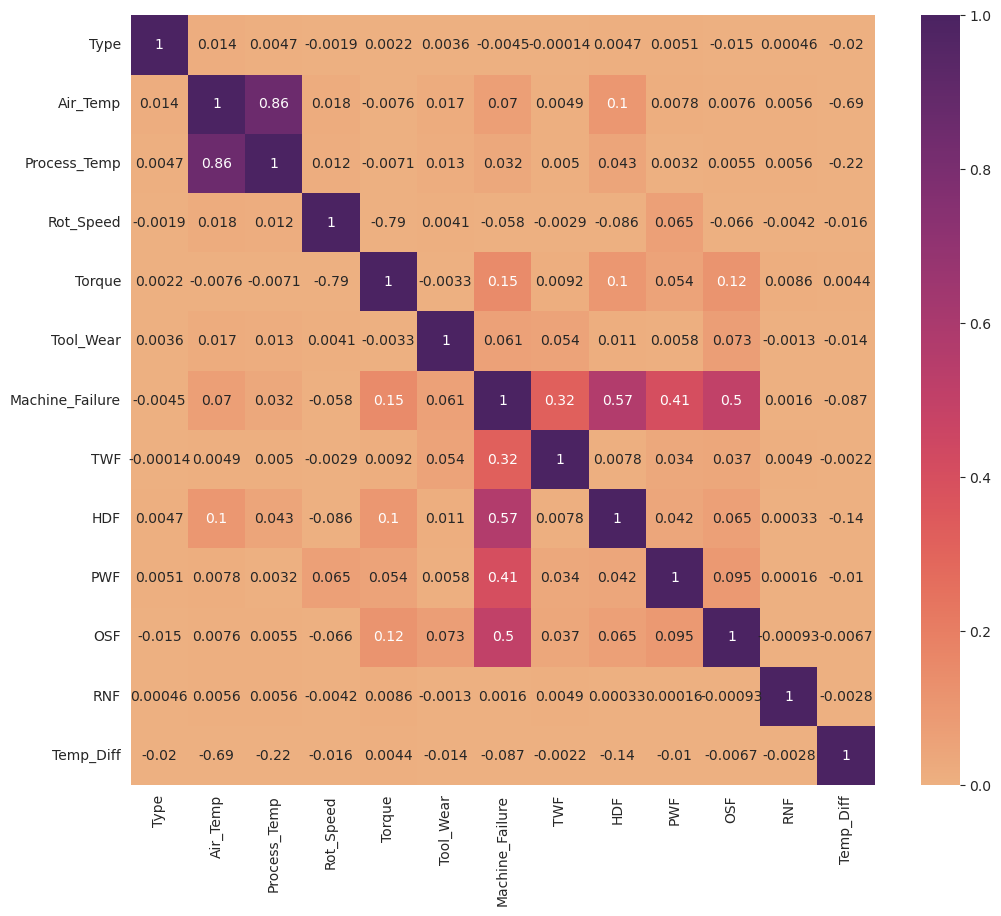

In [39]:
features = [i for i in train_data.columns]
corr = train_nor[features].corr(numeric_only=False)
plt.figure(figsize = (12,10))
sns.heatmap(corr, cmap = 'flare', annot = True,vmin=0);
plt.show()

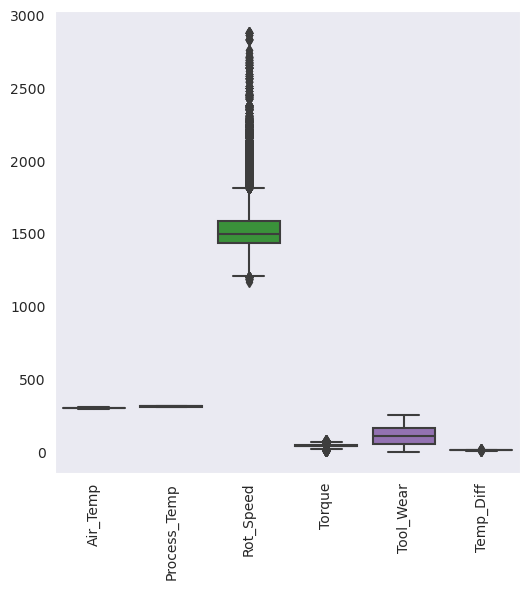

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Air_Temp'),
  Text(1, 0, 'Process_Temp'),
  Text(2, 0, 'Rot_Speed'),
  Text(3, 0, 'Torque'),
  Text(4, 0, 'Tool_Wear'),
  Text(5, 0, 'Temp_Diff')])

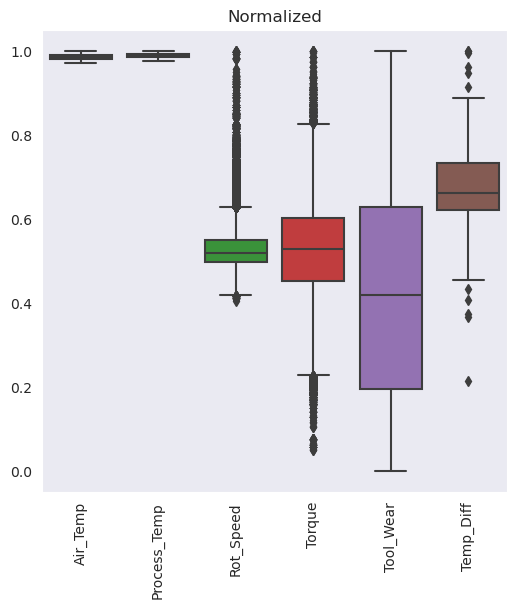

In [49]:
plotCols = [i for i in train_data.columns if len(train_nor[i].unique())>3]

plt.figure(figsize=(6,6))
sns.boxplot(train_data[plotCols]);
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6,6))
plt.title("Normalized")
sns.boxplot(train_nor[plotCols]);
plt.xticks(rotation=90)

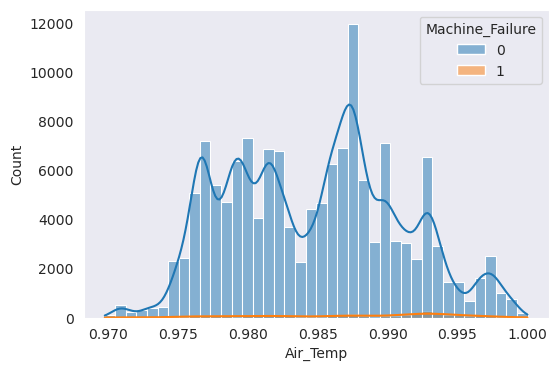

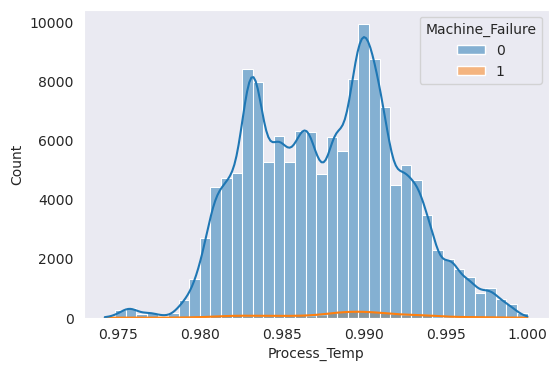

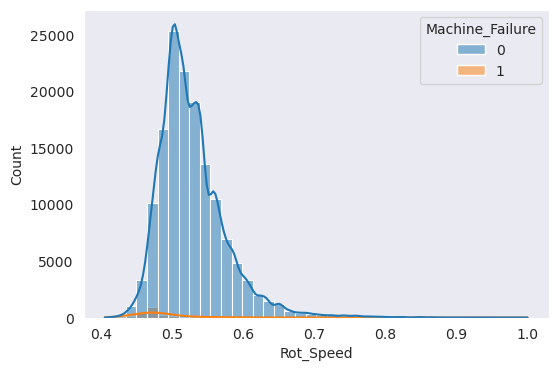

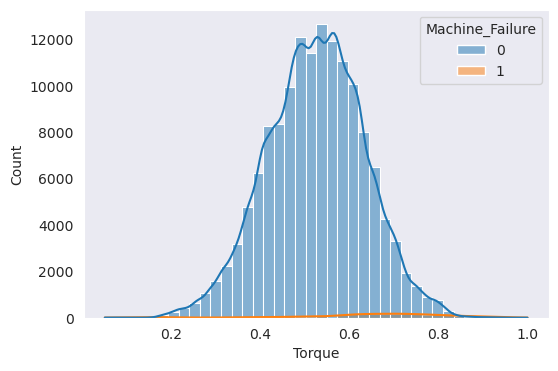

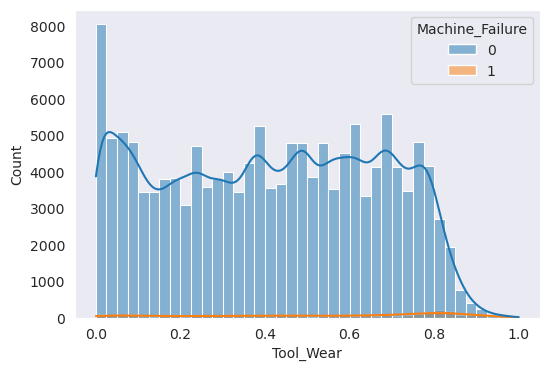

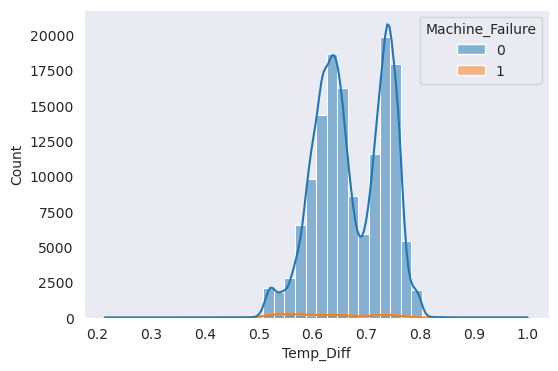

In [41]:
for i in plotCols:
    plt.figure(figsize=(6,4))
    sns.histplot(train_nor,x =i,hue="Machine_Failure",bins=40,kde=True);
    plt.show()

# Training Models
1. RandomForestClassifier
1. GradientBoostingClassifier
1. XGBClassifier
1. LGBMClassifier
1. HistGradientBoostingClassifier
1. CatBoostClassifier
1. VotingClassifier

In [42]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [51]:
cols = [i for i in train_data.columns if i!="Machine_Failure"]
seed = np.random.seed(0)

X = train_nor[cols]
y = train_nor["Machine_Failure"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=seed)

In [44]:
train_x = X_train
train_y = y_train

In [64]:
rfmodel = RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=seed)
rfmodel.fit(train_x,train_y)
print("ROC Area Under Curve of RF:",roc_auc_score(y_test, rfmodel.predict(X_test)))

In [63]:
gbmodel = GradientBoostingClassifier(n_estimators=1000,random_state=seed,warm_start=False)
gbmodel.fit(train_x,train_y)
print("ROC Area Under Curve of GB:",roc_auc_score(y_test, gbmodel.predict(X_test)))

In [ ]:
hgbmodel = HistGradientBoostingClassifier(max_iter=10000,random_state=seed,warm_start=False)
hgbmodel.fit(train_x,train_y)
print("ROC Area Under Curve of HGB:",roc_auc_score(y_test, hgbmodel.predict(X_test)))

In [ ]:
# n_estimators=2500,learning_rate-0.072 - Best accuracy
xgbmodel = XGBClassifier(n_estimators=1000,learning_rate=0.075,random_state=seed)
xgbmodel.fit(train_x,train_y, eval_set=[(X_test,y_test)],early_stopping_rounds=5,verbose=False)
print("ROC Area Under Curve of XGB:",roc_auc_score(y_test, xgbmodel.predict(X_test)))

In [ ]:
lgbmmodel = LGBMClassifier(max_depth=10,random_state=seed)
lgbmmodel.fit(train_x,train_y)
print("ROC Area Under Curve of LGBM:",roc_auc_score(y_test, lgbmmodel.predict(X_test)))

In [ ]:
catmodel = CatBoostClassifier(random_state=seed,verbose=False)
catmodel.fit(train_x,train_y)
print("ROC Area Under Curve of CAT:",roc_auc_score(y_test, catmodel.predict(X_test)))

In [ ]:
vcmodel = VotingClassifier([("xgb",xgbmodel),("cat",catmodel)])
vcmodel.fit(train_x,train_y)
print("ROC Area Under Curve of VC:",roc_auc_score(y_test, vcmodel.predict(X_test)))

In [ ]:
print("ROC Area Under Curve of RF:\t\t",roc_auc_score(y_test, rfmodel.predict(X_test)))
print("ROC Area Under Curve of GB:\t\t",roc_auc_score(y_test, gbmodel.predict(X_test)))
print("ROC Area Under Curve of HGB:\t",roc_auc_score(y_test, hgbmodel.predict(X_test)))
print("ROC Area Under Curve of XGB:\t",roc_auc_score(y_test, xgbmodel.predict(X_test)))
print("ROC Area Under Curve of LGBM:\t",roc_auc_score(y_test, lgbmmodel.predict(X_test)))
print("ROC Area Under Curve of CAT:\t",roc_auc_score(y_test, catmodel.predict(X_test)))
print("ROC Area Under Curve of VC:",roc_auc_score(y_test, vcmodel.predict(X_test)))

# Fitting on Entire Train Data

In [65]:
vcmodel.fit(X,y)

# Creating 'submission.csv' 

In [55]:
predictions = vcmodel.predict(test_nor)

In [59]:
submission = test_nor.copy()

colsToDrop = [i for i in submission.columns]
submission.drop(colsToDrop,axis=1,inplace=True)
submission["Machine failure"] = predictions

In [61]:
submission.head()

,Machine failure
id,
136429,0
136430,0
136431,0
136432,0
136433,0


In [62]:
submission.to_csv("submission.csv",index=True,header=True)